## IMDB Sentiment Analysis Data Text Processing/Normalization
Eric Kim

In [26]:
# importing libraries

import pandas as pd
import numpy as np
import re
from collections import Counter

In [28]:
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

In [29]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kimster/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/kimster/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/kimster/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kimster/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /Users/kimster/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Loading In Data

In [32]:
# reading in our dataset
data = pd.read_csv('/Users/kimster/Desktop/IMDB Dataset.csv')
data.head(20)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


## Text Processing 

In [12]:
# removing html and special characters
def remove_tags(string):
    string = re.sub('<br />','', string)          
    string = re.sub('https://.*','', string)   
    string = re.sub(r'[^a-zA-z0-9\s]', '', string) 
    string = string.lower()
    return string

data['review'] = data['review'].apply(lambda x: remove_tags(x))
data

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,im going to have to disagree with the previous...,negative


In [16]:
# importing stopwords
from nltk.corpus import stopwords

# setting up stopwords as english
stop_words = set(stopwords.words('english'))

# removing stopwords 
data['review'] = data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [18]:
# checking data
data['review']

0        one reviewers mentioned watching 1 oz episode ...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically theres family little boy jake thinks...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment side maltin...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 50000, dtype: object

In [36]:
# tokenizing by whitespace 
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

# lemmetizing the words 
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    st = ''
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + ' '
    return st

data['review'] = data.review.apply(lambda x: lemmatize_text(x))
data

,review,sentiment
0,one reviewer mentioned watching 1 oz episode h...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter mattei love time money visually stunnin...,positive
...,...,...
49995,thought movie right good job creative original...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary school nu...,negative
49998,going disagree previous comment side maltin on...,negative


## Uploading Preprocessed Data

In [35]:
og_data = pd.read_csv('/Users/kimster/Desktop/mystufff/IMDB Dataset.csv')
og_data.loc[1, 'review']

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [37]:
data.loc[1,'review']

'wonderful little production filming technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sen particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done '

In [28]:
# loading data into a csv
data.to_csv('/Users/kimster/Desktop/mystufff/aosc650_data2.csv')

In [14]:
# finding the most common words that could be eliminated from the data
all_words = list(pre_X.apply(lambda x: x.split(' ')))
all_words = [x for y in all_words for x in y]

# printing out the top 20 most common words
Counter(all_words).most_common(20)

NameError: name 'pre_X' is not defined

In [17]:
# removing the top five most common words
n_words = 3
most_common = [word for word, count in Counter(all_words).most_common(n_words)]

def remove_common(text):
    '''function for removing the most common words in a text'''
    return ' '.join(word for word in str(text).split() if word not in most_common)

pre_X = pre_X.apply(lambda x: remove_common(x))

In [18]:
# checking the word counts after removing the most common words
pre_X.apply(lambda x: len(x.split()))

0        167
1         83
2         85
3         62
4        116
        ... 
49995     80
49996     55
49997    115
49998    111
49999     60
Name: review, Length: 50000, dtype: int64

In [16]:
import seaborn as sns
import numpy as np

In [12]:
cm = np.array([[4308, 727],[504, 4461]])
cm

array([[4308,  727],
       [ 504, 4461]])

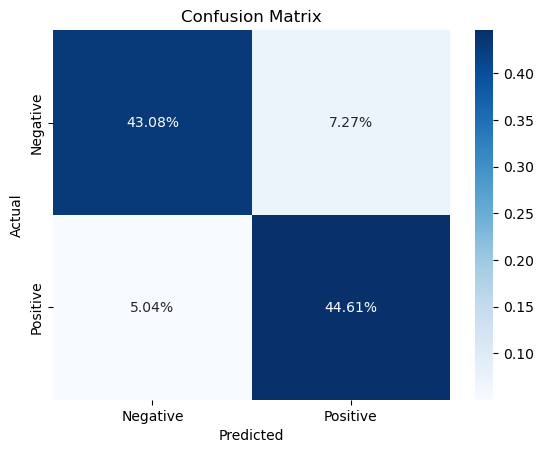

In [24]:
import matplotlib.pyplot as plt     

ax = plt.subplot()
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative', 'Positive']); ax.yaxis.set_ticklabels(['Negative', 'Positive']);